In [ ]:

%pip install gymnasium matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

In [5]:

env = gym.make("FrozenLake-v1", is_slippery=True, render_mode=None)

In [6]:

state_space = env.observation_space.n
action_space = env.action_space.n
q_table = np.zeros((state_space, action_space))

In [7]:

num_episodes = 2000
max_steps = 100
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

In [8]:

rewards_all_episodes = []

for episode in range(num_episodes):
    state, _ = env.reset()
    total_rewards = 0

    for step in range(max_steps):
        if np.random.rand() > epsilon:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[new_state, :]) - q_table[state, action]
        )

        state = new_state
        total_rewards += reward

        if done:
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards_all_episodes.append(total_rewards)

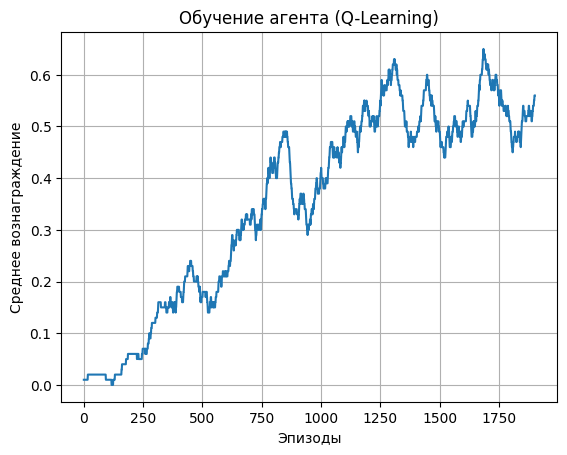

In [9]:
def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.plot(moving_average(rewards_all_episodes))
plt.xlabel('Эпизоды')
plt.ylabel('Среднее вознаграждение')
plt.title('Обучение агента (Q-Learning)')
plt.grid()
plt.show()